<a href="https://colab.research.google.com/github/shadab4150/Eye-Disease-Detection/blob/master/eye_disease_Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
!pip install torchviz

     |████████████████████████████████| 51kB 2.6MB/s 
  Created wheel for torchviz: filename=torchviz-0.0.1-cp36-none-any.whl size=3523 sha256=d7a6ac926e33937492b179ec9234feb4bc94465bfb6d67027a6d34470eb27883
  Stored in directory: /root/.cache/pip/wheels/2a/c2/c5/b8b4d0f7992c735f6db5bfa3c5f354cf36502037ca2b585667
Successfully built torchviz


In [0]:
from fastai.vision import *
import matplotlib.pyplot as plt
import matplotlib.image as immg


import pandas as pd
import numpy as np

import seaborn as sns
from tqdm import tnrange,tqdm
import gc
from graphviz import Digraph
import torch
from torch.autograd import Variable
from torchviz import make_dot

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip '/content/drive/My Drive/Dataset/dataset_eye.zip' -d '/content/eye/'

In [0]:
eye_img = [ '/content/eye/1_normal/NL_289.png', 
'/content/eye/2_cataract/cataract_095.png',
'/content/eye/2_glaucoma/Glaucoma_094.png', 
'/content/eye/3_retina_disease/Retina_084.png']

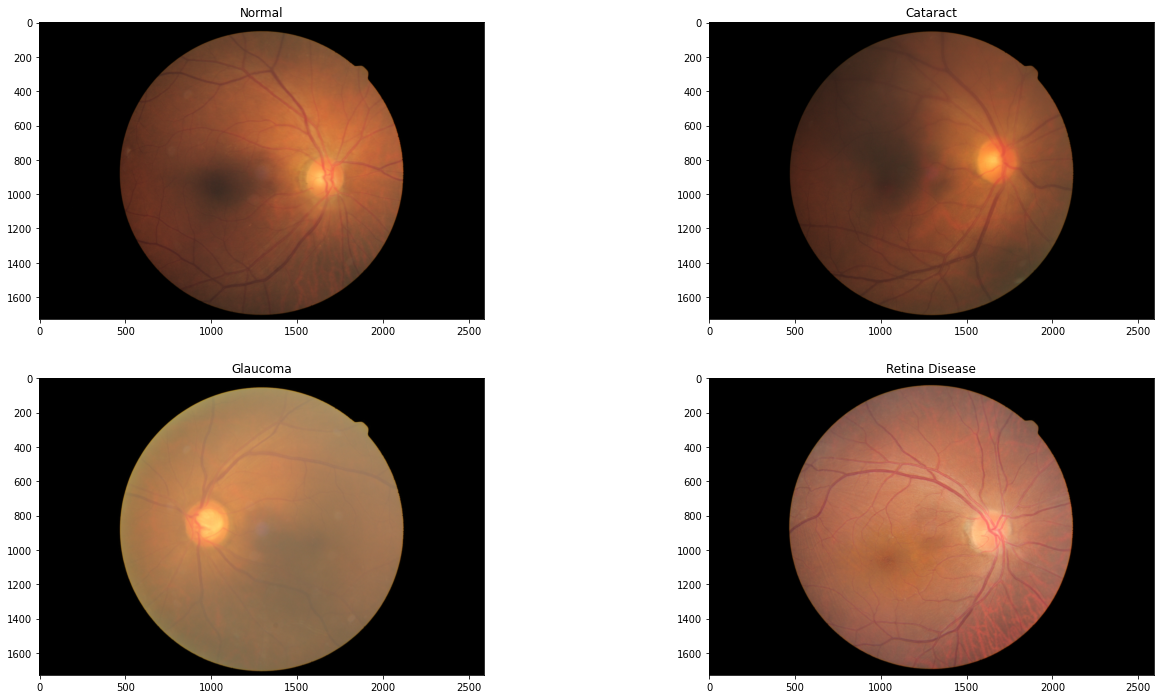

In [70]:
plt.figure(1,figsize=(22,12))
plt.subplot(221)
img0 = immg.imread(eye_img[0])
plt.imshow(img0)
plt.title('Normal')
plt.subplot(222)
img1 = immg.imread(eye_img[1])
plt.imshow(img1)
plt.title('Cataract')
plt.subplot(223)
img2 = immg.imread(eye_img[2])
plt.imshow(img2)
plt.title('Glaucoma')
plt.subplot(224)
img3 = immg.imread(eye_img[3])
plt.imshow(img3)
plt.title('Retina Disease')
plt.show()

In [0]:
home = Path('/content/eye_train/')

In [0]:
tfms = get_transforms(do_flip=True,max_lighting=0.2)

In [0]:
data = (ImageDataBunch.from_folder(home,train='.',valid_pct=0.12,ds_tfms=tfms,size=256,seed=364).normalize(imagenet_stats))

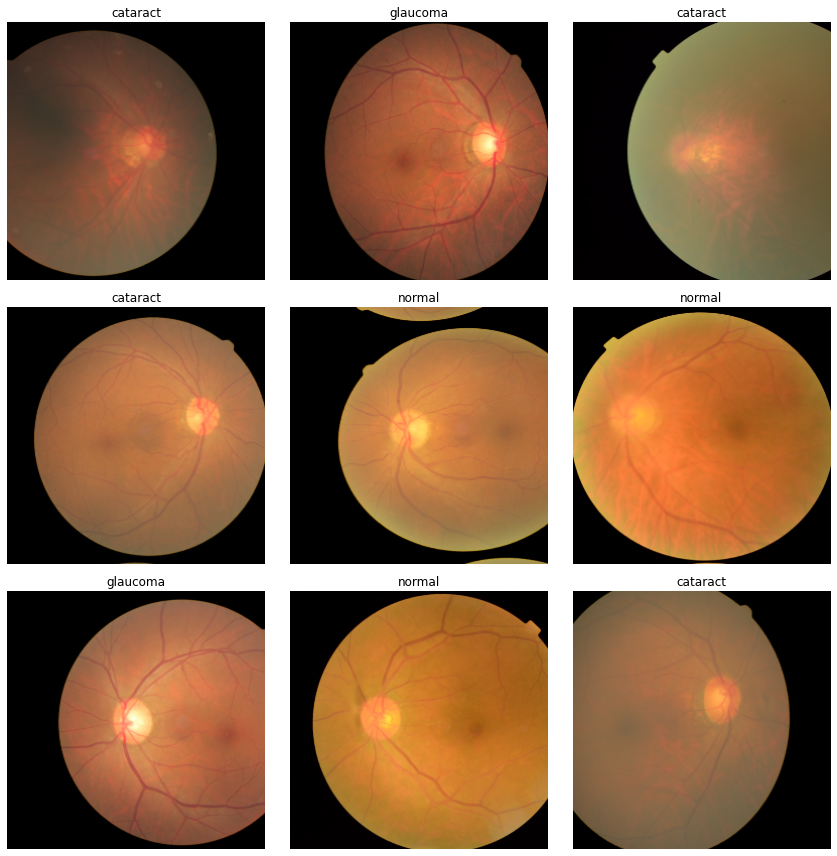

In [76]:
data.show_batch(rows=3)

In [77]:
data.classes,len(data.train_ds),len(data.valid_ds)

(['cataract', 'glaucoma', 'normal', 'retina_disease'], 529, 72)

In [0]:
fb = FBeta()
fb.average = 'macro'
rec = Recall()
rec.average = 'macro'
pre = Precision()
pre.average = 'macro'

arch = models.resnet50

In [0]:
learn = cnn_learner(data, arch, metrics=[fb,rec,pre,accuracy])

## Model Structure

In [0]:
archi = models.resnet50(pretrained=False)
x = Variable(torch.rand(64, 3,256,256))
y = archi(x)

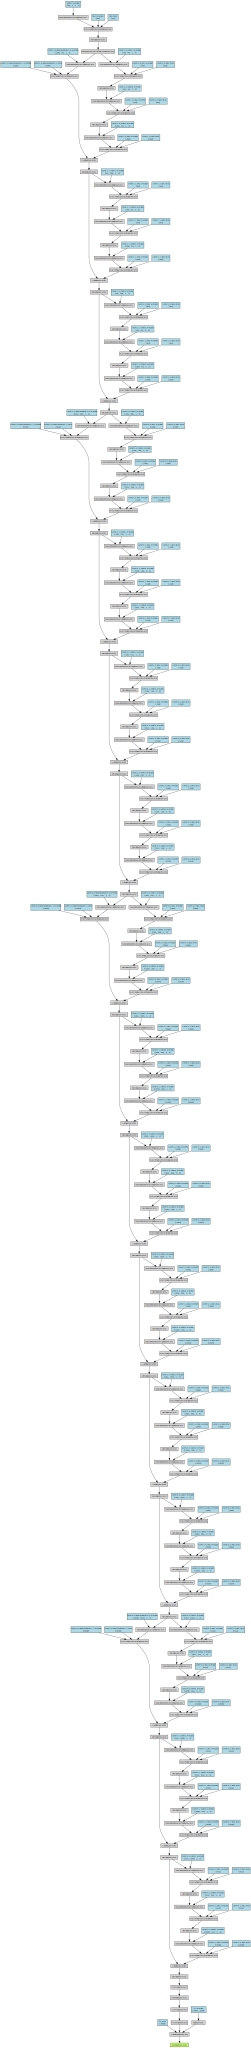

In [31]:
make_dot(y.mean(),params=dict(archi.named_parameters()))

In [8]:
gc.collect()

0

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


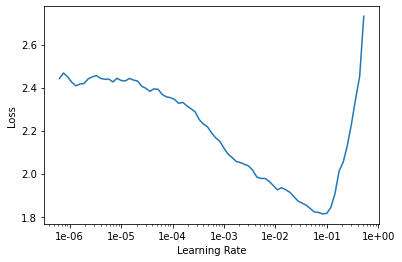

In [83]:
learn.lr_find()
learn.recorder.plot()

In [84]:
gc.collect()

7389

In [87]:
learn.fit_one_cycle(10, slice(1e-2) )

epoch,train_loss,valid_loss,f_beta,recall,precision,accuracy,time
0,2.057558,1.500991,0.418540,0.461382,0.371408,0.500000,00:14
1,1.842367,1.291075,0.501407,0.520969,0.503608,0.638889,00:14
2,1.679001,0.982910,0.540993,0.538177,0.572524,0.652778,00:14
3,1.491752,1.073391,0.508625,0.508774,0.512202,0.597222,00:14
4,1.355368,0.988569,0.545183,0.549898,0.588713,0.611111,00:14
5,1.196040,1.089262,0.508221,0.506843,0.567199,0.583333,00:14
6,1.080934,1.042039,0.563868,0.568496,0.581320,0.625000,00:13
7,0.998174,0.984491,0.575381,0.587398,0.565781,0.625000,00:13
8,0.908390,0.948870,0.575626,0.587398,0.580662,0.625000,00:14
9,0.842031,0.946556,0.583079,0.593496,0.588116,0.638889,00:13


In [0]:
learn.save('eye1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


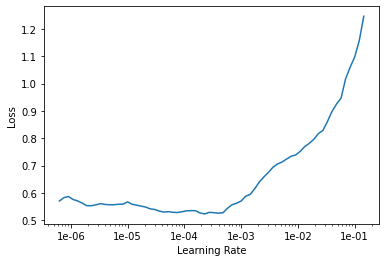

In [89]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [90]:
gc.collect()

6919

In [91]:
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(1e-5,1e-4) )

epoch,train_loss,valid_loss,f_beta,recall,precision,accuracy,time
0,0.584130,0.947596,0.605848,0.614329,0.604676,0.652778,00:15
1,0.589908,0.952128,0.610621,0.614329,0.615789,0.652778,00:14
2,0.540117,0.914539,0.633559,0.639329,0.645651,0.666667,00:15
3,0.515508,0.846509,0.662022,0.663720,0.685354,0.722222,00:14
4,0.513915,0.871258,0.646866,0.644817,0.667119,0.722222,00:14
5,0.488837,0.895715,0.662003,0.663720,0.670664,0.722222,00:14
6,0.463411,0.901247,0.646328,0.651524,0.650305,0.694444,00:15
7,0.433129,0.908033,0.646328,0.651524,0.650305,0.694444,00:15
8,0.408721,0.923994,0.646328,0.651524,0.650305,0.694444,00:14
9,0.386471,0.907750,0.646328,0.651524,0.650305,0.694444,00:14


In [0]:
learn.save('eye2')

In [0]:
data = (ImageDataBunch.from_folder(home,train='.',valid_pct=0.12,ds_tfms=tfms,size=512,seed=364).normalize(imagenet_stats))

In [0]:
learn.data = data

In [7]:
learn.load('eye2')

Learner(data=ImageDataBunch;

Train: LabelList (529 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
retina_disease,retina_disease,retina_disease,retina_disease,retina_disease
Path: /content/eye_train;

Valid: LabelList (72 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
glaucoma,normal,cataract,glaucoma,normal
Path: /content/eye_train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d

In [95]:
gc.collect()

135

In [0]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(1e-5,1e-4) )

In [8]:
interp = ClassificationInterpretation.from_learner(learn)

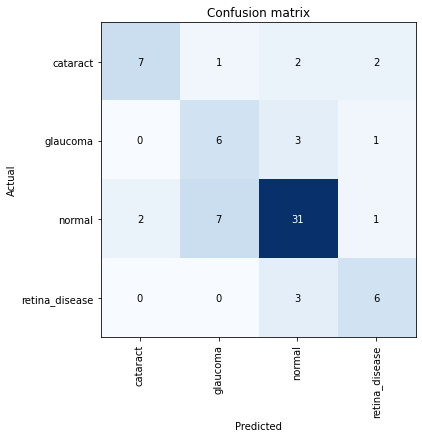

In [11]:
interp.plot_confusion_matrix(figsize=(6,6))

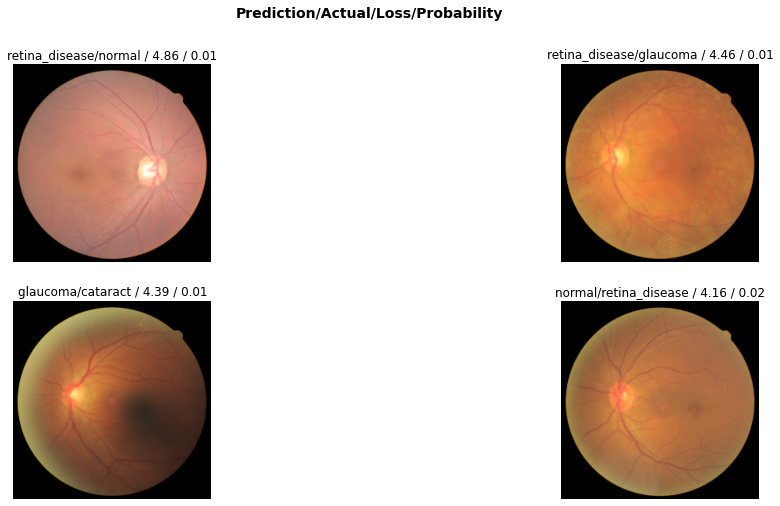

In [19]:
interp.plot_top_losses(k=4,figsize=(18,8))

## Plotting top Losses with Heatmap 
* To see to which pixels model was looking for feature generation

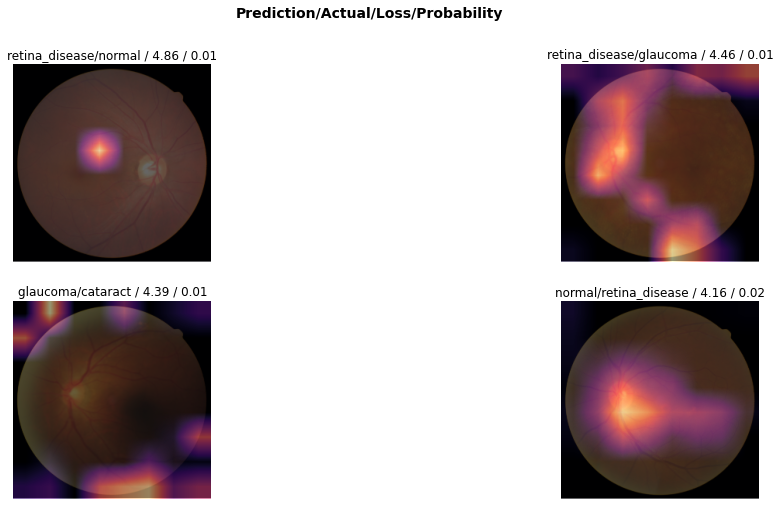

In [20]:
interp.plot_top_losses(k=4,figsize=(18,8),heatmap=True)

70 misclassified samples over 72 samples in the validation set.


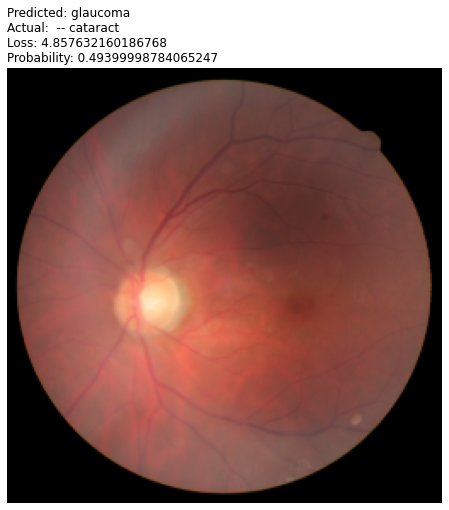

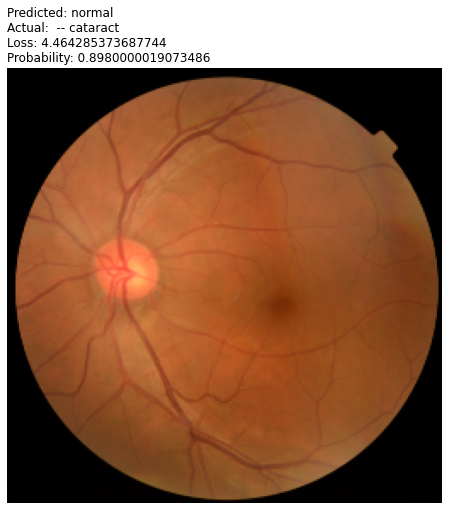

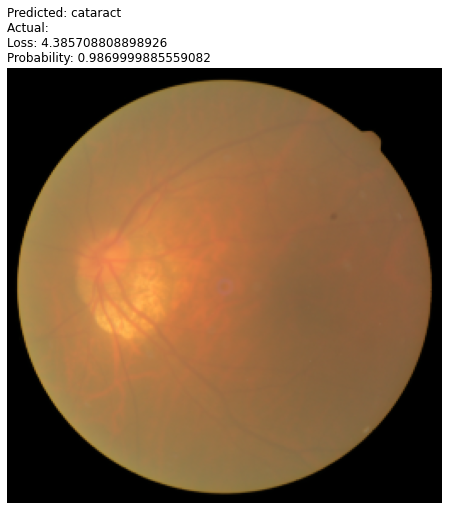

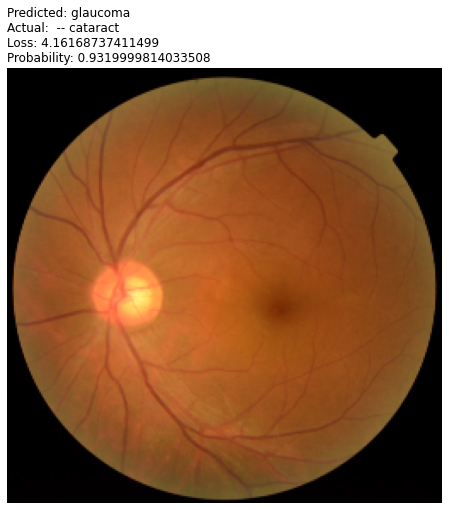

In [24]:
interp.plot_multi_top_losses(4,figsize=(20,8))

In [0]:
!cp '/content/eye_train/models/eye2.pth' '/content/drive/My Drive/Dataset/'